# Preparing

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np


In [42]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    './Data/Lego/LEGO brick images v1',
    target_size=(128, 128),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    './Data/Lego/LEGO brick images v1',
    target_size=(128, 128),
    batch_size=128,
    class_mode='categorical',
    subset='validation'
)

Found 5104 images belonging to 16 classes.
Found 1275 images belonging to 16 classes.


In [43]:
def display_history(history, names, title):
    plt.figure()
    plt.title(title)
    plt.plot(history.history[names[0]], label=names[0])
    plt.plot(history.history[names[1]], label=names[1])
    plt.xlabel("Epochs")
    plt.ylabel(names[0])
    plt.legend()
    plt.show()

In [44]:
def predict(model):
    history = model.fit(train_generator, validation_data=val_generator, epochs=10)
    # history = model.fit(x=train_set_x, y=train_set_y, batch_size=128, epochs=100, validation_data=(valid_set_x, valid_set_y))
    display_history(history, ['loss', 'val_loss'], "Loss")
    display_history(history, ['accuracy', 'val_accuracy'], "Accuracy")
    model.evaluate(val_generator)

# Variant 1

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │         4,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,783,632 (64.02 MB)

 Trainable params: 16,783,504 (64.02 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - Top2: 0.4119 - accuracy: 0.2641 - loss: 7.3588 - val_Top2: 0.1929 - val_accuracy: 0.1067 - val_loss: 2.4658
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - Top2: 0.7541 - accuracy: 0.5952 - loss: 1.1945 - val_Top2: 0.8078 - val_accuracy: 0.6110 - val_loss: 2.1541
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - Top2: 0.8704 - accuracy: 0.7382 - loss: 0.7324 - val_Top2: 0.8965 - val_accuracy: 0.7945 - val_loss: 2.0798
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - Top2: 0.9154 - accuracy: 0.8047 - loss: 0.5489 - val_Top2: 0.8800 - val_accuracy: 0.7780 - val_loss: 1.9475
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - Top2: 0.9384 - accuracy: 0.8380 - loss: 0.4386 - val_Top2: 0.8965 - val_accuracy: 0.7875 - val_loss: 1.6089
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - Top2: 0.9540 - accuracy: 0.8581 - loss: 0.3591 - val_Top2: 0.9012 - val_accuracy: 0.7992 - val_loss: 1.4495
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━

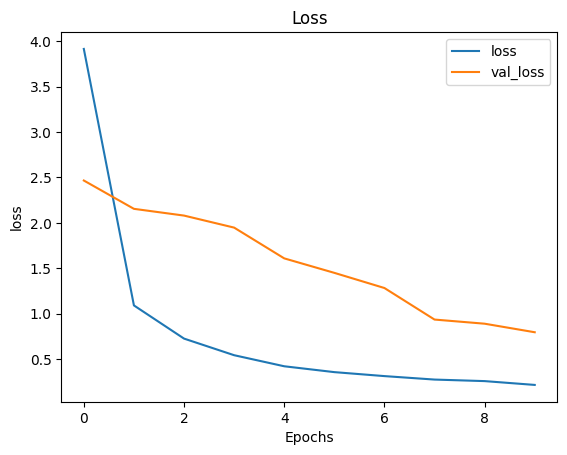

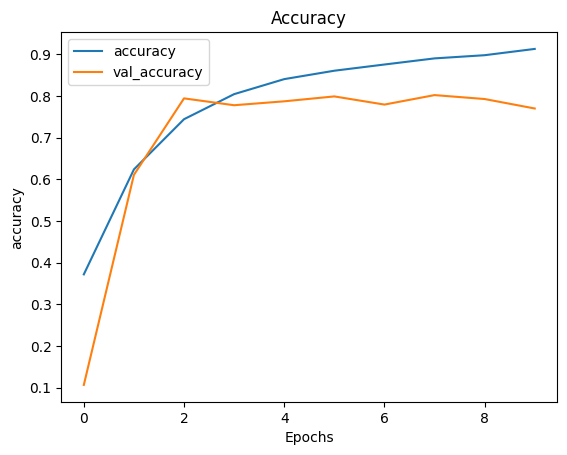

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - Top2: 0.9033 - accuracy: 0.7692 - loss: 0.7916


In [45]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
# ])
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(128,128,3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(4, 4))

#model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.MaxPooling2D(2, 2))
#model.add(tf.keras.layers.Dropout(0.25))

#model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(tf.keras.layers.BatchNormalization())

#model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.MaxPooling2D(2, 2))

# !!! Important to remind 
# sigmoid - from 0 to 1 (for 2 classes)
# softmax - from 0 to 1 (for 3 or more classes)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(train_generator.num_classes, activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │         4,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,237,904 (16.17 MB)

 Trainable params: 4,237,648 (16.17 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - Top2: 0.4810 - accuracy: 0.3389 - loss: 3.5255 - val_Top2: 0.3082 - val_accuracy: 0.1875 - val_loss: 2.4631
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - Top2: 0.7700 - accuracy: 0.6033 - loss: 1.1646 - val_Top2: 0.2706 - val_accuracy: 0.1671 - val_loss: 3.5664
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - Top2: 0.8428 - accuracy: 0.7087 - loss: 0.8249 - val_Top2: 0.2329 - val_accuracy: 0.1145 - val_loss: 5.4458
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - Top2: 0.8797 - accuracy: 0.7479 - loss: 0.6884 - val_Top2: 0.2243 - val_accuracy: 0.1827 - val_loss: 6.4382
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - Top2: 0.9101 - accuracy: 0.7885 - loss: 0.5739 - val_Top2: 0.2024 - val_accuracy: 0.1882 - val_loss: 7.8769
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - Top2: 0.9321 - accuracy: 0.8159 - loss: 0.4695 - val_Top2: 0.2753 - val_accuracy: 0.2157 - val_loss: 6.8586
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 62

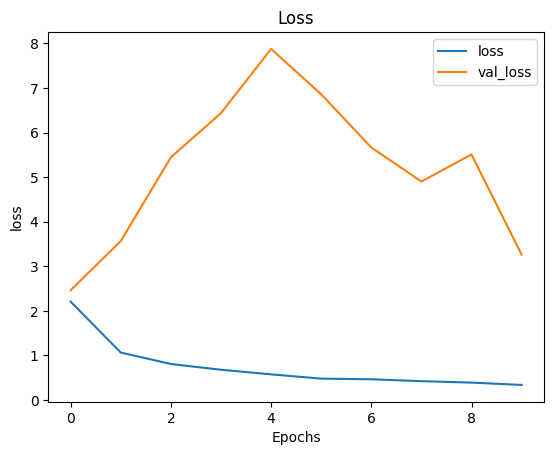

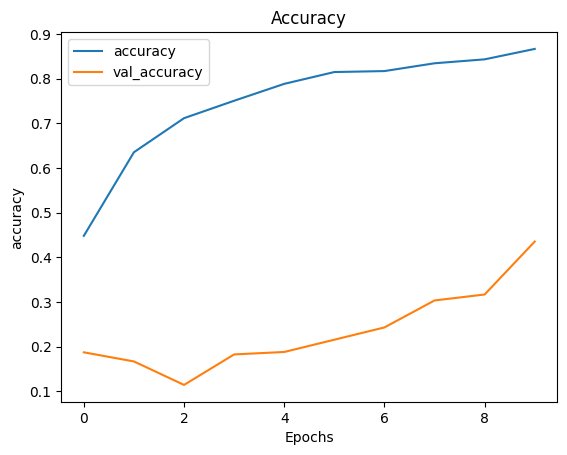

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step - Top2: 0.5821 - accuracy: 0.4356 - loss: 3.3093


In [46]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(128,128,3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(train_generator.num_classes, activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │         4,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,506,576 (32.45 MB)

 Trainable params: 8,506,064 (32.45 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - Top2: 0.4717 - accuracy: 0.3244 - loss: 4.5412 - val_Top2: 0.1255 - val_accuracy: 0.0627 - val_loss: 7.3059
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - Top2: 0.7836 - accuracy: 0.6246 - loss: 1.1225 - val_Top2: 0.1255 - val_accuracy: 0.0627 - val_loss: 31.5692
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - Top2: 0.8433 - accuracy: 0.7039 - loss: 0.8700 - val_Top2: 0.1255 - val_accuracy: 0.0627 - val_loss: 65.6617
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - Top2: 0.8926 - accuracy: 0.7656 - loss: 0.6778 - val_Top2: 0.1216 - val_accuracy: 0.0627 - val_loss: 114.0337
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - Top2: 0.9103 - accuracy: 0.8016 - loss: 0.5429 - val_Top2: 1.0000 - val_accuracy: 0.0627 - val_loss: 170.1081
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - Top2: 0.9268 - accuracy: 0.8194 - loss: 0.4912 - val_Top2: 1.0000 - val_accuracy: 0.0627 - val_loss: 216.5889
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━

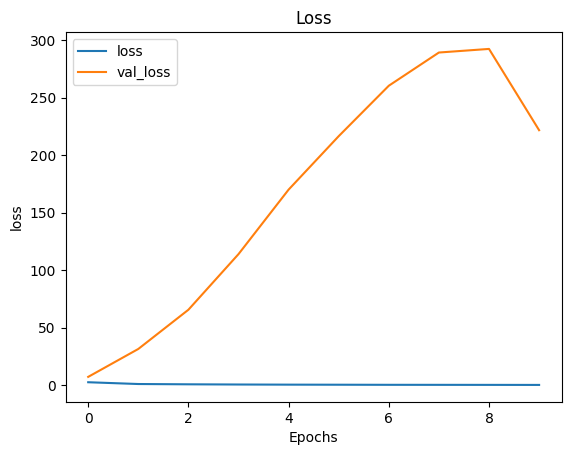

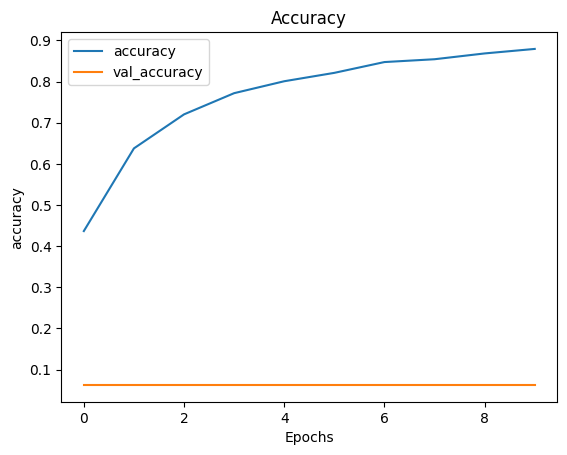

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - Top2: 0.4573 - accuracy: 0.0697 - loss: 220.1077


In [47]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(128,128,3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(train_generator.num_classes, activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │         4,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,363,216 (9.01 MB)

 Trainable params: 2,362,448 (9.01 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - Top2: 0.3666 - accuracy: 0.2354 - loss: 3.7450 - val_Top2: 0.1255 - val_accuracy: 0.0627 - val_loss: 3.0928
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - Top2: 0.6336 - accuracy: 0.4353 - loss: 1.6080 - val_Top2: 0.1255 - val_accuracy: 0.0627 - val_loss: 4.2172
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - Top2: 0.7336 - accuracy: 0.5203 - loss: 1.3010 - val_Top2: 0.1255 - val_accuracy: 0.0627 - val_loss: 7.1358
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - Top2: 0.7967 - accuracy: 0.5931 - loss: 1.0509 - val_Top2: 0.1255 - val_accuracy: 0.0627 - val_loss: 15.9805
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - Top2: 0.8167 - accuracy: 0.6394 - loss: 0.9426 - val_Top2: 0.1255 - val_accuracy: 0.0627 - val_loss: 24.2672
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - Top2: 0.8488 - accuracy: 0.6823 - loss: 0.8644 - val_Top2: 0.1255 - val_accuracy: 0.0627 - val_loss: 41.1617
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━

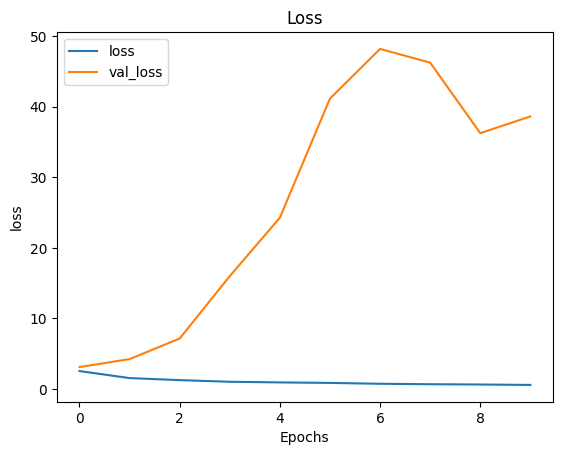

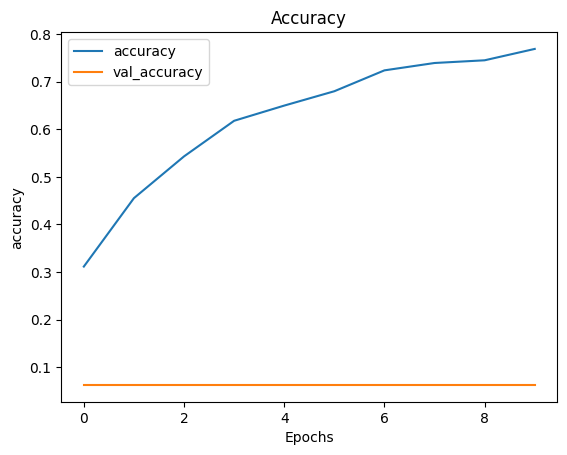

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step - Top2: 0.1410 - accuracy: 0.0597 - loss: 38.5305


In [48]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(128,128,3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(4, 4))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(train_generator.num_classes, activation='softmax'))


model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

In [49]:
# history = model.fit(train_generator, validation_data=val_generator, epochs=10)
# # history = model.fit(train_generator, validation_split=0.2, epochs=10)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step


Text(0.5, 1.0, 'Predicted Object: 3 | Real Object: 8')

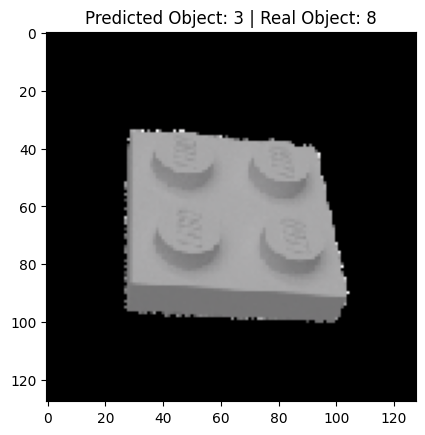

In [50]:
item_to_predict = 0
plt.imshow(val_generator[0][0][item_to_predict])
predictions = model.predict(val_generator)
plt.title(f'Predicted Object: {np.argmax(predictions[item_to_predict])} | Real Object: {np.argmax(val_generator[0][-1][item_to_predict])}')